## XGboost modelling




In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/TOTAL.csv')

data.head()

,date,price,wind,demand,photo,temp,thermo,hydro_disp,hydro_prod
0,2014-01-01 01:00:00,0.535,11052000,21136100,151,2791.0,0,16503000,1649700
1,2014-01-01 02:00:00,0.500,10774000,19911100,160,2791.0,0,16503000,1492600
2,2014-01-01 03:00:00,0.050,10669000,19060000,151,2792.0,0,16503000,1346200
3,2014-01-01 04:00:00,0.000,10595000,19080200,154,2793.0,0,16503000,1328300
4,2014-01-01 05:00:00,0.000,10242000,18719500,164,2794.0,0,16503000,1304600


In [3]:
new_data = data[['wind','demand','photo','temp','thermo','hydro_disp','hydro_prod']]


In [4]:
X = new_data.values
y = data['price'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [71]:
#Fitting XGB regressor 
model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.4, gamma=0.3, subsample=0.9,
                               colsample_bytree=1, max_depth=5,objective='reg:squarederror')
model.fit(X_train,y_train)
print (model)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.3,
       importance_type='gain', learning_rate=0.4, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=0.9, verbosity=1)


In [72]:
output = model.predict(data=X_test)
output

array([5.431054 , 4.4149313, 3.4674544, ..., 1.363234 , 6.1873384,
       2.1331277], dtype=float32)

In [87]:
comp=pd.DataFrame({'pred':output,'real':y_test})
comp.head()

,pred,real
0,5.431054,5.098
1,4.414931,4.367
2,3.467454,2.108
3,4.203823,4.421
4,7.473138,7.841


In [39]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)
def npr2(x,y):
    return np.corrcoef(x,y)[0,1]**2

C:\Users\cgodoy\AppData\Local\Continuum\anaconda2\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


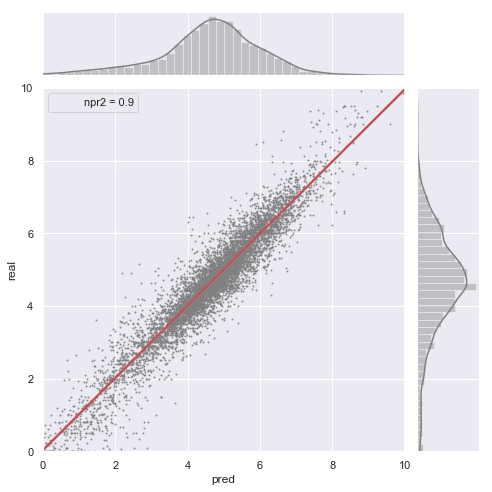

In [88]:
sns.set(style="darkgrid")
g = sns.jointplot("pred", "real", data=comp, kind="reg",
                  xlim=(0,10), ylim=(0, 10), color="grey", 
                  height=7,stat_func=npr2, scatter_kws={'s':1},
                  joint_kws={'color':'grey','line_kws':{'color':'r'}})

In [94]:
pintar=data[data['date']>='2017-05-01 00:00:00']
pintar.head()

,date,price,wind,demand,photo,temp,thermo,hydro_disp,hydro_prod
24438,2017-05-01 01:00:00,2.543,7350430,19512600,822,2823.0,101750,16584900,996100
24439,2017-05-01 02:00:00,2.886,6878140,19271400,825,2815.0,101000,16584900,1017200
24440,2017-05-01 03:00:00,3.001,6335000,19283000,872,2809.0,101000,16584900,888100
24441,2017-05-01 04:00:00,3.401,6084140,19558400,1494,2804.0,92250,16584900,939400
24442,2017-05-01 05:00:00,3.498,5710860,19137100,54104,2803.0,38000,16584900,1008800


In [95]:
new_pintar = pintar[['wind','demand','photo','temp','thermo','hydro_disp','hydro_prod']]

In [96]:
y = pintar['price'].values
X = new_pintar.values

In [97]:
output_2 = model.predict(data=X)
output_2

array([2.7227733, 3.0635073, 3.102362 , ..., 5.6877112, 5.312685 ,
       5.319164 ], dtype=float32)

In [98]:
comp2=pd.DataFrame({'predicted':output_2,'real':y})
comp2.head()

,predicted,real
0,2.722773,2.543
1,3.063507,2.886
2,3.102362,3.001
3,3.029477,3.401
4,3.723514,3.498


C:\Users\cgodoy\AppData\Local\Continuum\anaconda2\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


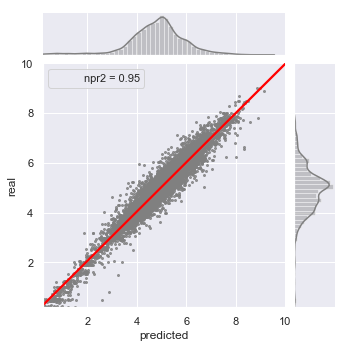

In [103]:
gr = sns.jointplot("predicted", "real", data=comp2, kind="reg",
                  xlim=(0.2, 10), ylim=(0.2, 10), color="grey", 
                 height=5,stat_func=npr2, scatter_kws={'s':4},
                  joint_kws={'color':'grey','line_kws':{'color':'red'}}, ci=95)

In [102]:
PRED=comp2.rename(columns={'real':'price'})
PRED.head()

,predicted,price
0,2.722773,2.543
1,3.063507,2.886
2,3.102362,3.001
3,3.029477,3.401
4,3.723514,3.498


In [104]:
pre=PRED.merge(pintar,left_on= 'price',right_on='price',how='inner')
pre.head()

,predicted,price,date,wind,demand,photo,temp,thermo,hydro_disp,hydro_prod
0,2.722773,2.543,2017-05-01 01:00:00,7350430,19512600,822,2823.0,101750,16584900,996100
1,3.063507,2.886,2017-05-01 02:00:00,6878140,19271400,825,2815.0,101000,16584900,1017200
2,3.102362,3.001,2017-05-01 03:00:00,6335000,19283000,872,2809.0,101000,16584900,888100
3,3.102362,3.001,2017-12-31 19:00:00,14799900,28535100,304,2846.0,0,17432900,2570500
4,3.069327,3.001,2017-05-01 03:00:00,6335000,19283000,872,2809.0,101000,16584900,888100


In [107]:
pre=pre.drop(['price'],axis=1)

In [108]:
pre=pre.rename(columns={'predicted':'price'})
pre.head()

,price,date,wind,demand,photo,temp,thermo,hydro_disp,hydro_prod
0,2.722773,2017-05-01 01:00:00,7350430,19512600,822,2823.0,101750,16584900,996100
1,3.063507,2017-05-01 02:00:00,6878140,19271400,825,2815.0,101000,16584900,1017200
2,3.102362,2017-05-01 03:00:00,6335000,19283000,872,2809.0,101000,16584900,888100
3,3.102362,2017-12-31 19:00:00,14799900,28535100,304,2846.0,0,17432900,2570500
4,3.069327,2017-05-01 03:00:00,6335000,19283000,872,2809.0,101000,16584900,888100


In [109]:
#file generation
pre.to_csv("prediction.csv", index=False)